In [169]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

from torchsummary import summary

In [170]:
X = np.load("Xtrain_Classification_Part1.npy")
X_TESTE = np.load("Xtest_Classification_Part1.npy")
Y = np.load("Ytrain_Classification_Part1.npy")

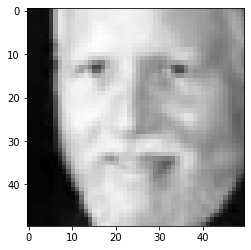

In [171]:
X = X.reshape(X.shape[0], 50, 50,1) / 255

plt.imshow(X[98], cmap="gray")
plt.show()

In [172]:
X = X.reshape(X.shape[0], 1, 50, 50)

X_tensor = torch.Tensor(X).float()
Y_tensor = torch.Tensor(Y).long()

#split the data
trainX, testX, trainY, testY = train_test_split(X_tensor, Y_tensor)

#convert to pytorch data
trainX = TensorDataset(trainX, trainY)
testX = TensorDataset(testX, testY)

trainLoader = DataLoader(trainX)
testLoader = DataLoader(testX)

print(trainLoader.dataset.tensors[0].shape)
print(testLoader.dataset.tensors[0].shape)

torch.Size([4852, 1, 50, 50])
torch.Size([1618, 1, 50, 50])


In [173]:
def createGervasio():
    class gervasio(nn.Module):
        def __init__(self) -> None:
            super().__init__()

            self.conv1 = nn.Conv2d(1, 10, 50, stride=1, padding=1)

            self.conv2 = nn.Conv2d(10, 20, 2, stride=1, padding=1)

            expectSize = np.floor( (5+2*0-1)/1 ) +1
            expectSize = 20*int(expectSize**2)

            self.fc1 = nn.Linear(expectSize,50)

            self.out = nn.Linear(50, 1)
        
        def forward(self, x):
            print(f"input: {x.shape}")

            x = F.relu( F.max_pool2d(self.conv1(x), 2) )
            print(f"layer conv1/pool1: {x.shape}")

            x = F.relu( F.max_pool2d(self.conv2(x), 2) )
            print(f"layer conv2/pool2: {x.shape}")

            nUnits = x.shape.numel()/x.shape[0]
            x = x.view(-1, int(nUnits))

            x = F.relu(self.fc1(x))
            print(f"layer fc1: {x.shape}")

            x = self.out(x)
            print(f"layer out: {x.shape}")
    
    #criar o gervasio
    Gervasio = gervasio()

    #loss func 
    lossF = nn.BCEWithLogitsLoss() #binary cross entropy with logits

    optimizer = torch.optim.Adam(Gervasio.parameters(), lr=0.001)

    return Gervasio, lossF, optimizer



In [174]:
Gervasio, lossF, optimizer = createGervasio()

x, y = iter(trainLoader).next()
y_pred = Gervasio(x)

print(f"Loss: {lossF(y_pred, y)}")

input: torch.Size([1, 1, 50, 50])
layer conv1/pool1: torch.Size([1, 10, 1, 1])
layer conv2/pool2: torch.Size([1, 20, 1, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x20 and 500x50)